In [59]:
from sklearn.datasets import fetch_mldata

In [60]:
mnist = fetch_mldata('MNIST original')

In [61]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [62]:
X, y = mnist["data"], mnist["target"]

In [63]:
X.shape

(70000, 784)

In [64]:
y.shape

(70000,)

In [65]:
%matplotlib inline

In [66]:
import matplotlib

In [67]:
import matplotlib.pyplot as plt

In [68]:
some_digit = X[36000]

In [69]:
some_digit_image = some_digit.reshape(28, 28)

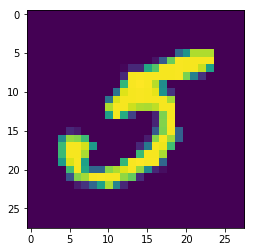

In [70]:
plt.imshow(some_digit_image, interpolation="nearest")

In [75]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [76]:
import numpy as np

In [77]:
shuffle_index = np.random.permutation(60000)

In [78]:
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [79]:
#Binary classification of "5"

In [80]:
y_train_5 = (y_train == 5)

In [81]:
y_test_5 = (y_test == 5)

In [82]:
from sklearn.linear_model import SGDClassifier

In [83]:
sgd_clf = SGDClassifier(random_state=42)

In [84]:
sgd_clf.fit(X_train, y_train_5)

/Users/mateusz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [85]:
sgd_clf.predict([some_digit])

array([False], dtype=bool)

In [86]:
from sklearn.cross_validation import cross_val_score

In [87]:
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring="accuracy")

/Users/mateusz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/mateusz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/mateu

array([ 0.96765,  0.9562 ,  0.9654 ])

In [88]:
from sklearn.cross_validation import cross_val_predict

In [105]:
y_train_5_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

/Users/mateusz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/mateusz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/mateu

In [106]:
from sklearn.metrics import confusion_matrix

In [107]:
confusion_matrix(y_train_5, y_train_5_pred)

array([[54170,   409],
       [ 1806,  3615]])

In [108]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [109]:
precision_score(y_train_5, y_train_5_pred)

0.89835984095427435

In [110]:
recall_score(y_train_5, y_train_5_pred)

0.6668511344770337

In [111]:
f1_score(y_train_5, y_train_5_pred)

0.7654843832715722

In [112]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

/Users/mateusz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/mateusz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/mateu

In [113]:
from sklearn.metrics import precision_recall_curve

In [114]:
precisions, recalls, tresholds = precision_recall_curve(y_train_5, y_scores)

In [115]:
def plot_precision_recall_curve(precisions, recalls, tresholds):
    plt.plot(tresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(tresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Treshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])

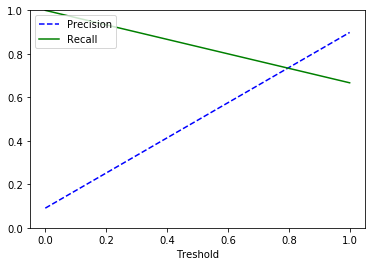

In [116]:
plot_precision_recall_curve(precisions, recalls, tresholds)

In [117]:
from sklearn.metrics import roc_curve

In [118]:
fpr, tpr, treshold = roc_curve(y_train_5, y_scores)

In [119]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], "k--")
    plt.axis([0,1,0,1])
    plt.ylabel("False positive ratio")
    plt.xlabel("True positive ration")

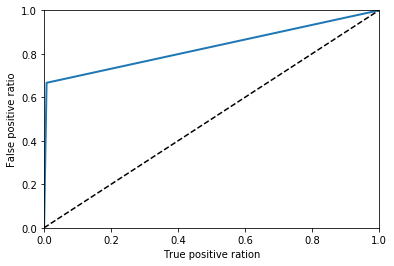

In [120]:
plot_roc_curve(fpr, tpr)

In [121]:
#Multiclass

In [127]:
sgd_clf.fit(X_train, y_train)

/Users/mateusz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [129]:
sgd_clf.predict([some_digit])

array([ 5.])

In [131]:
some_digic_score = sgd_clf.decision_function([some_digit])

In [134]:
sgd_clf.classes_[5]

5.0

In [135]:
from sklearn.ensemble import RandomForestClassifier

In [136]:
forest_clf = RandomForestClassifier()

In [137]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [138]:
forest_clf.predict([some_digit])

array([ 5.])

In [139]:
forest_clf.predict_proba([some_digit])

array([[ 0. ,  0. ,  0.1,  0.1,  0. ,  0.7,  0. ,  0.1,  0. ,  0. ]])

In [140]:
#imptove model

In [143]:
cross_val_score(forest_clf, X_train, y_train, scoring="accuracy")

array([ 0.94296141,  0.94279714,  0.94204131])

In [145]:
from sklearn.preprocessing import StandardScaler

In [146]:
scaler = StandardScaler()

In [147]:
X_train_scaler = scaler.fit_transform(X_train.astype(np.float64))

In [148]:
cross_val_score(forest_clf, X_train_scaler, y_train, scoring="accuracy")

array([ 0.94156169,  0.93949697,  0.93899085])

In [149]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaler, y_train, cv=3)

/Users/mateusz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/mateusz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/mateu

In [150]:
conf_mx = confusion_matrix(y_train, y_train_pred)

In [151]:
conf_mx

array([[5740,    2,   22,    9,   11,   46,   44,    9,   37,    3],
       [   1, 6476,   44,   32,    6,   40,    8,   13,  112,   10],
       [  56,   35, 5354,   91,   79,   22,   90,   58,  158,   15],
       [  47,   35,  142, 5349,    4,  237,   41,   56,  132,   88],
       [  20,   28,   46,    9, 5336,    8,   59,   37,   82,  217],
       [  68,   42,   40,  192,   73, 4604,  115,   32,  162,   93],
       [  33,   22,   43,    2,   39,   84, 5643,    6,   46,    0],
       [  27,   17,   73,   32,   50,    9,    6, 5812,   19,  220],
       [  53,  154,   81,  169,   11,  164,   61,   25, 5001,  132],
       [  40,   28,   27,   93,  158,   32,    3,  200,   83, 5285]])

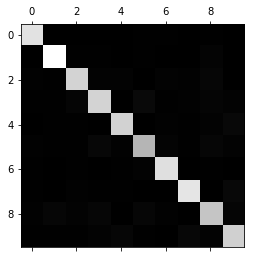

In [153]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

In [154]:
row_sums = conf_mx.sum(axis=1, keepdims=True)

In [155]:
norm_conf_mx = conf_mx / row_sums

In [156]:
np.fill_diagonal(norm_conf_mx, 0)

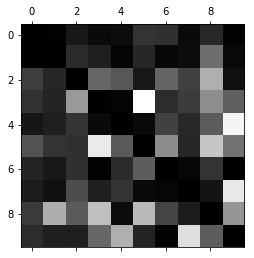

In [157]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

some_digic_score